In [8]:
from modules.bounds_calculator import bounds_calculator

Demonstration of using the bound files.


In [9]:

import numpy as np
from scipy.stats import norm


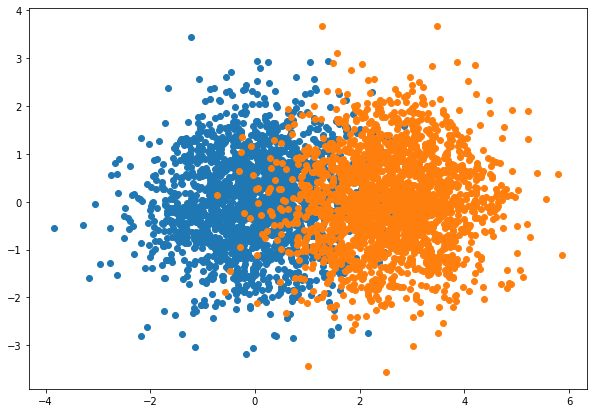

True BER is  0.10027258671155662


In [10]:



dim = 3

diff = 2.56

mean1 = np.zeros(dim)
covariance1 = np.identity(dim)
mean2 = np.zeros(dim)
mean2[0] = diff # set the difference between the two means
covariance2= np.identity(dim)
        
samples = 2000

data0 = np.random.multivariate_normal(mean1, covariance1, samples)
data1 = np.random.multivariate_normal(mean2, covariance2, samples)


import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.scatter(data0[:, 0], data0[:, 1])
ax.scatter(data1[:, 0], data1[:, 1])



plt.show()

from scipy.stats import norm

dx = 0.001
x = np.arange(-10, 10 + dx, dx)
# Define the normal distributions
f0 = norm.pdf(x, loc=diff, scale =1)
f1 = norm.pdf(x, loc=0, scale =1)
# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)
print("True BER is ", BER)

Running the bounds

In [11]:

import matlab.engine
eng = matlab.engine.start_matlab()

In [12]:
bounds_calculator(data0, data1, MATLAB = eng)


{'dp_lower': 0.07588327078503493,
 'dp_upper': 0.14024999999999999,
 'Bhattacharyya_lower': 0.049205019377040415,
 'Bhattacharyya_upper': 0.21629582854309853,
 'tight_lower': 0.12479708415653115,
 'tight_upper': 0.12953897766431086,
 'Bha_knn_lower': 0.08819449484133024,
 'Bha_knn_upper': 0.28357754833733373,
 'enDive_lower': 0.0662045559621236,
 'enDive_upper': 0.12364302546396333,
 'influence_lower': 0.04755454433436407,
 'influence_upper': 0.21282177907233812}

## using the timer

This the time to compute the bounds. 

In [13]:
results, timer = bounds_calculator(data0, data1, MATLAB = eng, Timer = True)

timer

{'Dp': 5.667557001113892,
 'Bhattacharyya': 0.0014007091522216797,
 'Bha_knn': 0.07824993133544922,
 'enDive': 0.7809453010559082,
 'influence': 1.3427727222442627}

In [14]:
eng.quit()